# Bank Churn Prediction
Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

# Dataset
Bank Turnover Dataset
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

# 1. Read the dataset

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [40]:
### Removes warnings that occassionally show up
import warnings
warnings.filterwarnings('ignore')

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data_bank=pd.read_csv('/content/drive/MyDrive/Datasets/Churn.csv')
data_bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [43]:
data_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [44]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [45]:
data_bank.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

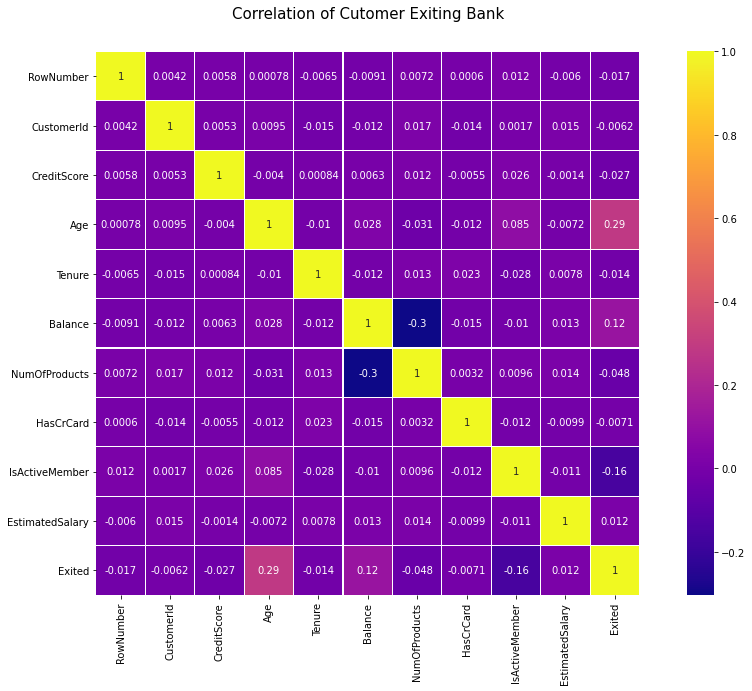

In [46]:
# CORRELATION - HEAT MAP
colormap = plt.cm.plasma
plt.figure(figsize=(17,10))
plt.title('Correlation of Cutomer Exiting Bank', y=1.05, size=15)
sns.heatmap(data_bank.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, 
            linecolor='white', annot=True)

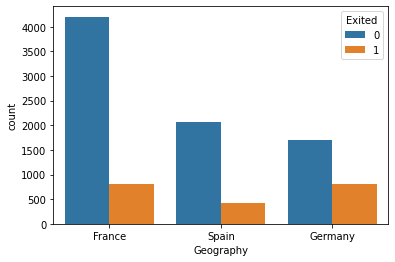

In [47]:
sns.countplot(x="Geography", data=data_bank,hue="Exited")

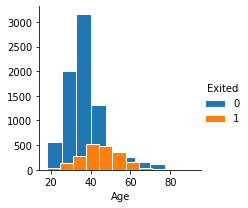

In [48]:
gendermap = sns.FacetGrid(data_bank,hue = 'Exited')
(gendermap.map(plt.hist,'Age',edgecolor="w").add_legend())

# 2. Drop the columns which are unique for all users like IDs (2.5 points)

In [49]:
bank_data_new = data_bank.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [50]:
## Label Encoding of all the columns
# instantiate labelencoder object
le = LabelEncoder()

# Categorical boolean mask
categorical_feature_mask = bank_data_new.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = bank_data_new.columns[categorical_feature_mask].tolist()
bank_data_new[categorical_cols] = bank_data_new[categorical_cols].apply(lambda col: le.fit_transform(col))
print(bank_data_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB
None


In [52]:
df_scaled = bank_data_new.apply(zscore)
X_columns =  df_scaled.columns.tolist()[1:10]
Y_Columns = bank_data_new.columns.tolist()[-1:]

X = df_scaled[X_columns].values
y = np.array(bank_data_new['Exited']) # Exited

print(y)
print(X)

[1 0 1 ... 1 1 0]
[[-0.90188624 -1.09598752  0.29351742 ...  0.64609167  0.97024255
   0.02188649]
 [ 1.51506738 -1.09598752  0.19816383 ... -1.54776799  0.97024255
   0.21653375]
 [-0.90188624 -1.09598752  0.29351742 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [-0.90188624 -1.09598752 -0.27860412 ... -1.54776799  0.97024255
  -1.00864308]
 [ 0.30659057  0.91241915  0.29351742 ...  0.64609167 -1.03067011
  -0.12523071]
 [-0.90188624 -1.09598752 -1.04143285 ...  0.64609167 -1.03067011
  -1.07636976]]


# 4. Divide the data set into training and test sets ( 2.5 points)

In [53]:
#splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 8)

In [54]:
X_train.shape

(8000, 9)

In [55]:
#Encoding the output class label (One-Hot Encoding)
y_train=to_categorical(y_train,2)
y_test=to_categorical(y_test,2)

# 5. Normalize the train and test data (5 points)

In [56]:
from sklearn.preprocessing import Normalizer
normalize=Normalizer(norm="l2")
X_train=normalize.transform(X_train)

print(X_train)

[[-0.32660661  0.33042097  0.41707339 ...  0.23397387  0.35136098
   0.45409568]
 [ 0.41088162 -0.29722845 -0.04969698 ... -0.41974993  0.2631268
  -0.26355289]
 [-0.26269006 -0.31922543 -0.30333543 ... -0.45081435  0.28260002
  -0.48071808]
 ...
 [ 0.52973741  0.31902381  0.06928721 ...  0.22590344 -0.3603698
   0.19493733]
 [ 0.11730923  0.34911441 -0.17957026 ... -0.59221479 -0.39436019
  -0.28109801]
 [ 0.09429018  0.28060932 -0.05635766 ... -0.47600724  0.29839258
   0.53266892]]


In [57]:
X_test=normalize.transform(X_test)
print(X_test)

[[ 0.11961429 -0.42759232  0.63533595 ...  0.25206841  0.37853375
  -0.13253872]
 [ 0.10480879 -0.3746662   0.58929281 ...  0.22086812  0.33167995
   0.1222605 ]
 [ 0.50531507 -0.36554085 -0.15652774 ...  0.21548867 -0.34375576
   0.41137911]
 ...
 [ 0.11278809  0.33565943 -0.2077281  ...  0.23768326 -0.37916142
   0.59518817]
 [-0.3643766   0.36863206  0.08006139 ...  0.26103146 -0.41640736
   0.22923692]
 [-0.30802696  0.31162433 -0.09515344 ...  0.22066381 -0.35201134
   0.35994045]]


# 6. Initialize & build the model.

In [58]:
#build mode;
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()
model.add(Dense(units=6, activation='relu', input_shape=(9,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_8 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 22        
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________


In [59]:
history=model.fit(X_train, y_train, batch_size=45, epochs=200, validation_data=(X_test,y_test))

Epoch 1/200
178/178 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.5005 - val_loss: 0.5641 - val_accuracy: 0.7935
Epoch 2/200
178/178 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7975 - val_loss: 0.5240 - val_accuracy: 0.7935
Epoch 3/200
178/178 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7999 - val_loss: 0.5000 - val_accuracy: 0.7935
Epoch 4/200
178/178 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7958 - val_loss: 0.4787 - val_accuracy: 0.7935
Epoch 5/200
178/178 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.8061 - val_loss: 0.4625 - val_accuracy: 0.7935
Epoch 6/200
178/178 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8027 - val_loss: 0.4509 - val_accuracy: 0.7935
Epoch 7/200
178/178 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8016 - val_loss: 0.4422 - val_accuracy: 0.7935

# 7. Predict the results (5 points)

In [60]:
#test accuracy
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8635
[0.34006795287132263, 0.8634999990463257]


In [61]:
#train accuracy
score = model.evaluate(X_train, y_train,verbose=1)

print(score)

250/250 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8646
[0.331866055727005, 0.8646249771118164]


In [62]:
y_pred = model.predict(X_test)
y_pred

array([[9.0673763e-01, 9.3262322e-02],
       [9.7161555e-01, 2.8384464e-02],
       [9.9887162e-01, 1.1283708e-03],
       ...,
       [9.4531798e-01, 5.4682039e-02],
       [9.9939299e-01, 6.0696504e-04],
       [8.8893032e-01, 1.1106962e-01]], dtype=float32)

In [63]:
y_pred = (y_pred > 0.5)

# 8. Print the Accuracy score and confusion matrix (2.5 points)

In [64]:
from sklearn.metrics import confusion_matrix

confmatrx= confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
confmatrx

array([[1532,   55],
       [ 218,  195]])

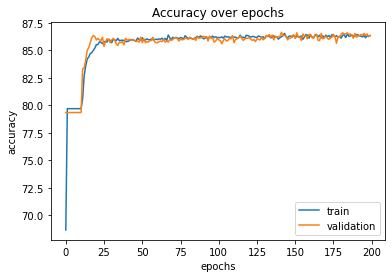

In [65]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [66]:
print (((confmatrx[0][0]+confmatrx[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

86.35 % of testing data was classified correctly


In [67]:
# Checking the accuracy using accuracy_score as well to check if the above calculation is correct or not.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8635

**Summary**

The Train and Test set are almost similar. It shows that the model did not  verfit on the train set.
On Compiling the Neural Network, I have used optimizer as "adam" as it is very efficient to Stochastic Gradient Decent. The loss function used is "binary_crossentropy which is used within adam.
The accuracy metrics which will be evaluated(minimized) by the model. The "Accuracy" is used as a criteria to improve model performance.¶
On calculation of the accuracy based on the Confusion Matrix, it came out as 86.45(APPROX). which matches with the score calculated through various EPOCH
We can used Optimizer as "SGD" as well to check if we get better results and accuracy.
HOWEVER, FOR BETTER RESULT WE CAN YOUR HYPER PARAMETER TUNING FOR BETTER RESULT.